## Support Vector Machines

## What Is It? 🤖
- Supervised machine learning algorithm used for **classification** and **regression**.  
- Finds the **optimal hyperplane** that separates data points of different classes.  
- **Support vectors** are the closest points to the hyperplane that determine the margin. ✨

## Why Is It Used? ⚡
- Effective in high-dimensional spaces. 📊  
- Can handle non-linear data using **kernel functions**. 🔄  
- Robust to overfitting with proper regularization. 🛡️  
- Ensures a clear margin of separation, improving generalization. 🎯

## Where Is It Used? 🌐
- **Text Classification:** Spam detection, sentiment analysis. 📝  
- **Image Recognition:** Facial recognition, object detection. 🖼️  
- **Bioinformatics:** Protein classification, gene expression analysis. 🧬  
- **Finance:** Credit scoring, fraud detection. 💰  
- **Healthcare:** Disease diagnosis, medical image analysis. 🏥

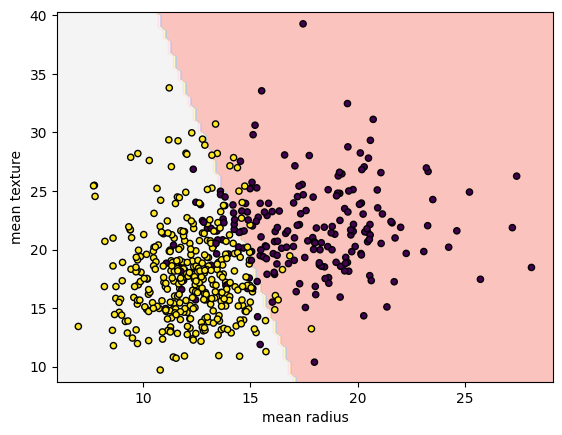

In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

svm = SVC(kernel="linear", C=1)
svm.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        alpha=0.8,
        cmap="Pastel1",
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

# Margin

## 📘 Hard Margin vs. Soft Margin in SVM

### **1. Hard Margin SVM**
- **Definition**: Seeks a hyperplane that perfectly separates data without any misclassifications.
- **Assumption**: Data is linearly separable.
- **Characteristics**:
  - No tolerance for misclassification.
  - Sensitive to outliers.
  - Maximizes the margin between classes.
- **Use Case**: Ideal for clean, well-separated datasets.

### **2. Soft Margin SVM**
- **Definition**: Allows some misclassifications to achieve better generalization.
- **Assumption**: Data may not be linearly separable.
- **Characteristics**:
  - Introduces slack variables to permit misclassifications.
  - Balances margin maximization and error minimization.
  - Controlled by the regularization parameter \( C \).
- **Use Case**: Suitable for real-world datasets with noise.


# Visualization of Hard margin and Soft margin

Hard Margin SVM Accuracy: 1.0
Hard Margin SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Soft Margin SVM Accuracy: 1.0
Soft Margin SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



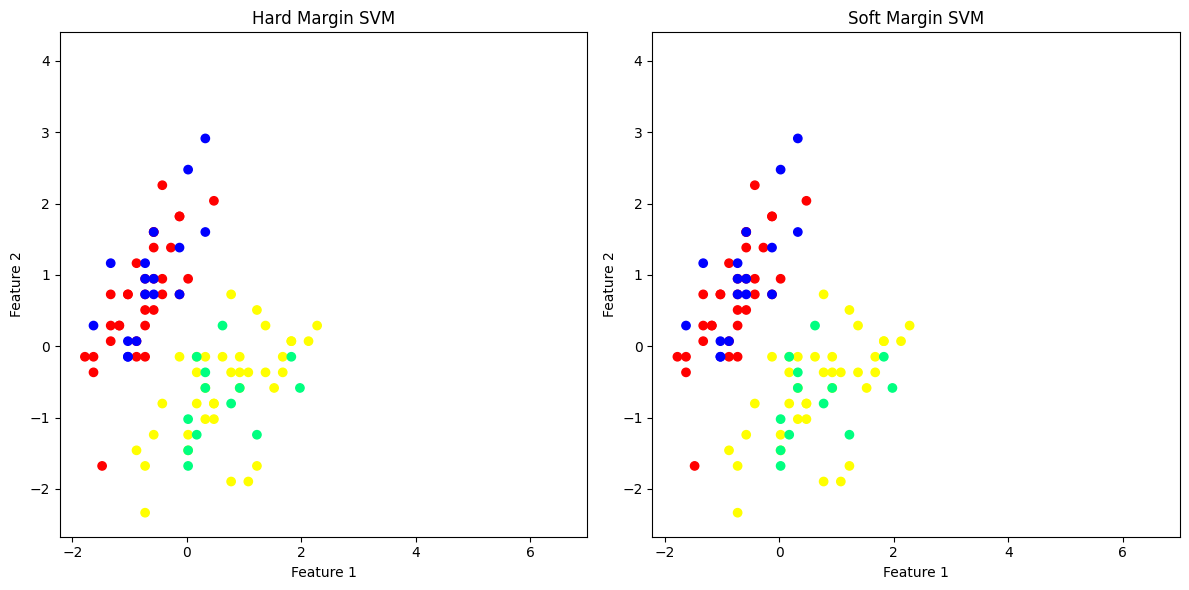

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Filtering out one class to make it a binary classification problem
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Hard Margin SVM ---
# Create and train the SVM model with a very large C value (approximating hard margin)
svm_hard = SVC(kernel='linear', C=1e10)
svm_hard.fit(X_train, y_train)

# Predicting and evaluate the model
y_pred_hard = svm_hard.predict(X_test)
print("Hard Margin SVM Accuracy:", accuracy_score(y_test, y_pred_hard))
print("Hard Margin SVM Classification Report:\n", classification_report(y_test, y_pred_hard))

# --- Soft Margin SVM ---
# Create and train the SVM model with a moderate C value (soft margin)
svm_soft = SVC(kernel='linear', C=1.0)
svm_soft.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_soft = svm_soft.predict(X_test)
print("Soft Margin SVM Accuracy:", accuracy_score(y_test, y_pred_soft))
print("Soft Margin SVM Classification Report:\n", classification_report(y_test, y_pred_soft))

# --- Visualization ---
# Plotting decision boundaries for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Hard Margin SVM
ax = axes[0]
ax.set_title("Hard Margin SVM")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = svm_hard.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# Soft Margin SVM
ax = axes[1]
ax.set_title("Soft Margin SVM")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
# Plot decision boundary
Z = svm_soft.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.tight_layout()
plt.show()

# Hyperplane

## 📘 Separating Hyperplanes in SVM 

### **What is a Separating Hyperplane?** ✨
- A hyperplane that divides the feature space into two regions, each corresponding to a different class.  
- In 2D, it's a line 🖊️; in 3D, it's a plane 📐; in higher dimensions, it's a hyperplane 🌌.

### **Support Vectors** 🧩
- Data points closest to the hyperplane that influence its position and orientation.  
- Lie on the margins of the classes 📏.

### **Margin** 📏
- The distance between the separating hyperplane and the support vectors.  
- SVM aims to maximize this margin for better generalization 🎯.

### **Optimal Hyperplane** 🏆
- The hyperplane that maximizes the margin between the support vectors of the two classes.  
- Achieved by minimizing the norm of the weight vector ⚖️.

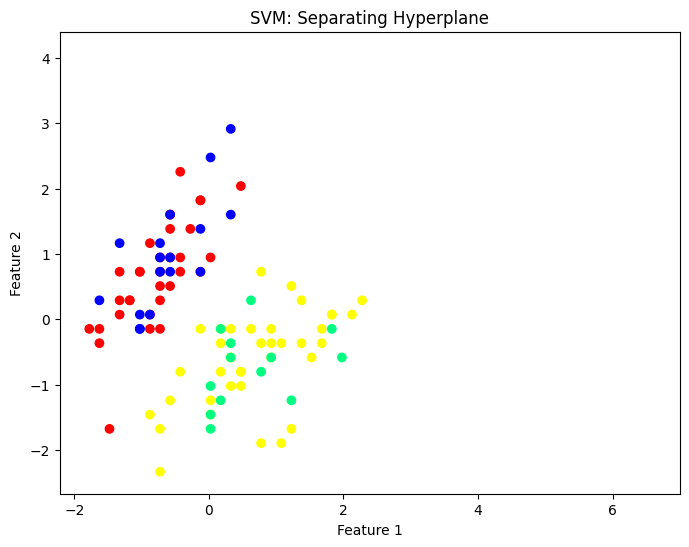

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Filtering out one class to make it a binary classification problem
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Get the weight vector and bias term
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

# Plotting the data points and the separating hyperplane
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter')

# Plot the separating hyperplane
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.title('SVM: Separating Hyperplane')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## ⚡ Linear SVM vs Kernel Trick in SVM

### **1. Linear SVM**
- **Definition**: A Support Vector Machine that separates data using a straight line (or hyperplane) in the original feature space.  
- **When to use**: Data is linearly separable.  
- **Pros**: Simple, fast, interpretable.  
- **Cons**: Cannot handle complex, non-linear patterns in data.  
- **Example**: Separating two classes of points that can be divided with a straight line. 📏

### **2. Kernel Trick**
- **Definition**: A method to transform data into a higher-dimensional space where it becomes linearly separable, then applies SVM in that space.  
- **When to use**: Data is not linearly separable in the original feature space.  
- **Common Kernels**:
  - **Polynomial Kernel**   
  - **Radial Basis Function (RBF) / Gaussian Kernel**   
  - **Sigmoid Kernel** 
- **Pros**: Can handle complex, non-linear patterns.  
- **Cons**: Computationally heavier, less interpretable.  
- **Example**: Separating concentric circles of two classes that cannot be separated with a straight line.


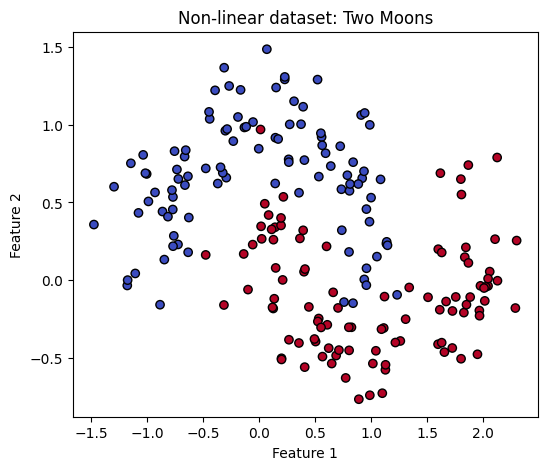

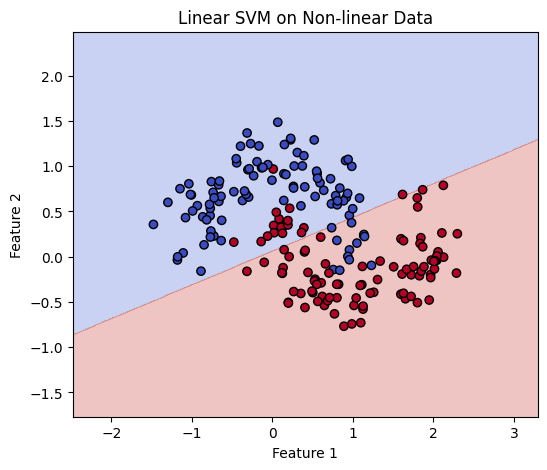

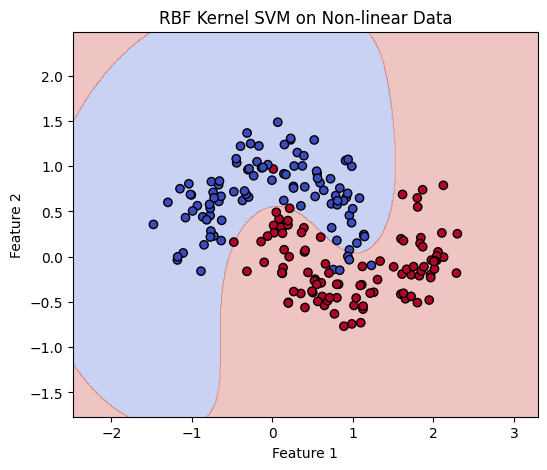

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# -----------------------------
# Step 1: Generate a non-linear dataset
# -----------------------------
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Plot the dataset
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Non-linear dataset: Two Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# -----------------------------
# Step 2: Train Linear SVM
# -----------------------------
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X, y)

# -----------------------------
# Step 3: Train RBF Kernel SVM
# -----------------------------
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X, y)

# -----------------------------
# Step 4: Function to plot decision boundaries
# -----------------------------
def plot_svm(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# -----------------------------
# Step 5: Plot decision boundaries
# -----------------------------
plot_svm(linear_svm, X, y, "Linear SVM on Non-linear Data")
plot_svm(rbf_svm, X, y, "RBF Kernel SVM on Non-linear Data")


## 📘 Naive Bayes Classifiers

### **What is Naive Bayes?** 🤔
- A family of **probabilistic classifiers** based on **Bayes' Theorem**.
- Assumes that **features are conditionally independent** given the class label.
- Despite the "naive" assumption, it works surprisingly well in many real-world applications.

---

### **Why Use Naive Bayes?** ⚡
- **Simplicity**: Easy to understand and implement  
- **Efficiency**: Requires small training data and is fast  
- **Performance**: Works well even with high-dimensional data  
- **Scalability**: Handles large datasets effectively  

---

### **Where Is It Used?** 🌎
- **Text Classification**: Spam detection, sentiment analysis, document categorization  
- **Medical Diagnosis**: Predicting diseases based on symptoms  
- **Recommendation Systems**: Predicting user preferences  
- **Image Classification**: Classifying images based on features  

# Gaussian

### 1️⃣ Gaussian Naive Bayes

**What?** 🤔  
- A variant of Naive Bayes that assumes features follow a Gaussian (normal) distribution.  
- Suitable for continuous numeric data.  

**Why?** ⚡  
- Simple and fast to implement.  
- Performs well with small datasets and high-dimensional data.  
- Works when features are normally distributed.  

**Where?** 🌍  
- Medical diagnosis (e.g., predicting disease based on lab results)  
- Sensor data analysis  
- Any dataset with continuous numeric features  

In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9778


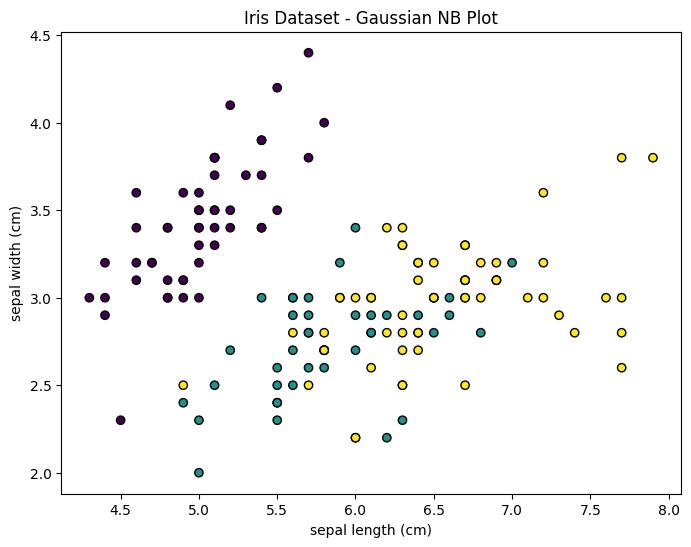

In [22]:
import matplotlib.pyplot as plt

# Select two features for simple plotting
X_vis = X.iloc[:, :2]  # first two features
y_vis = y

# Plot the points
plt.figure(figsize=(8,6))
plt.scatter(X_vis.iloc[:,0], X_vis.iloc[:,1], c=y_vis, cmap='viridis', edgecolor='k')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Iris Dataset - Gaussian NB Plot')
plt.show()

### 2️⃣ Multinomial Naive Bayes

**What?** 🤔  
- Assumes that **features follow a multinomial distribution**.  
- Suitable for **discrete count data**, like word counts in text classification.  

**Why?** ⚡  
- Works well with **text data** and document classification.  
- Handles frequency/count features efficiently.  
- Performs well on high-dimensional sparse data.  

**Where?** 🌍  
- Spam detection in emails  
- Document categorization  
- Sentiment analysis  
- News topic classification  

In [20]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample dataset
data = {
    'text': [
        'Free money now',
        'Call now to claim your prize',
        'Meet me at the park',
        'Let’s catch up later',
        'Win a new car today!',
        'Lunch plans?',
        'Congratulations! You won a lottery',
        'Can you send me the report?',
        'Exclusive offer for you',
        'Are you coming to the meeting?'
    ],
    'label': ['spam', 'spam', 'not spam', 'not spam', 'spam', 
              'not spam', 'spam', 'not spam', 'spam', 'not spam']
}

# Create DataFrame
df = pd.DataFrame(data)

# Encode labels: spam = 1, not spam = 0
df['label'] = df['label'].map({'spam': 1, 'not spam': 0})

# Split features and labels
X = df['text']
y = df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text to vectors
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

# Make predictions
y_pred = model.predict(X_test_vectors)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

# Test with a custom message
custom_message = ["Congratulations, you've won a free vacation"]
custom_vector = vectorizer.transform(custom_message)
prediction = model.predict(custom_vector)
print("Prediction for custom message:", "Spam" if prediction[0] == 1 else "Not Spam")

Accuracy: 66.67%

Prediction for custom message: Spam


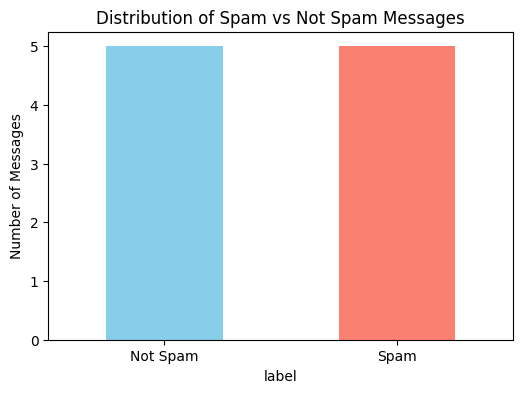

In [23]:
import matplotlib.pyplot as plt

# Count the number of spam and not spam messages
label_counts = df['label'].value_counts()

# Plot
plt.figure(figsize=(6,4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks(ticks=[0,1], labels=['Not Spam', 'Spam'], rotation=0)
plt.ylabel('Number of Messages')
plt.title('Distribution of Spam vs Not Spam Messages')
plt.show()

### 3️⃣ Bernoulli Naive Bayes

**What?** 🤔  
- Assumes **binary/boolean features** (presence or absence of a feature).  
- Suitable for datasets where each feature is **0 or 1**.  

**Why?** ⚡  
- Efficient for **binary occurrence data**.  
- Handles sparse data well.  
- Performs well for text classification with binary word occurrence.  

**Where?** 🌍  
- Email spam detection (word present or not)  
- Sentiment analysis (presence/absence of positive/negative words)  
- Any dataset with **binary features**  

=== Text Classification ===
Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



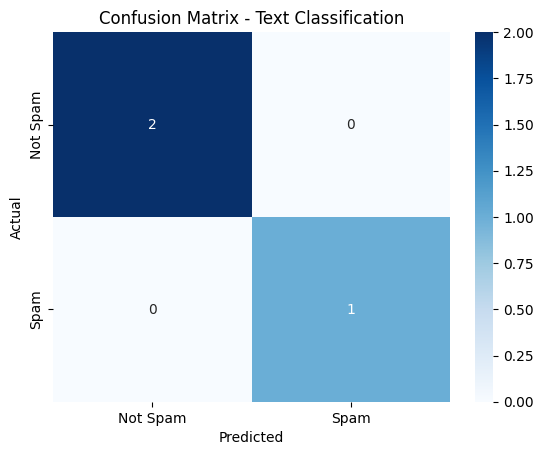

Prediction for custom message: Spam

=== Numeric Binary Classification ===
Predictions: [0 0 1]
Accuracy: 1.0
ROC-AUC: 1.0


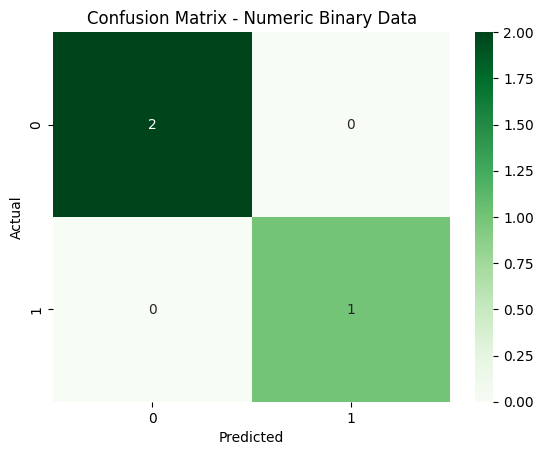

In [27]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


# Part 1: Text Classification
# Sample text dataset
data = {
    'text': [
        'Free money now',
        'Call now to claim your prize',
        'Meet me at the park',
        'Let’s catch up later',
        'Win a new car today!',
        'Lunch plans?',
        'Congratulations! You won a lottery',
        'Can you send me the report?',
        'Exclusive offer for you',
        'Are you coming to the meeting?'
    ],
    'label': ['spam', 'spam', 'not spam', 'not spam', 'spam', 
              'not spam', 'spam', 'not spam', 'spam', 'not spam']
}

# Create DataFrame
df = pd.DataFrame(data)
df['label'] = df['label'].map({'spam': 1, 'not spam': 0})

# Features and labels
X = df['text']
y = df['label']

# Spliting dataset with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert text to binary features
vectorizer = CountVectorizer(binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Bernoulli Naive Bayes
model_text = BernoulliNB()
model_text.fit(X_train_vec, y_train)

# Predictions
y_pred = model_text.predict(X_test_vec)

# Evaluation
print("=== Text Classification ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam','Spam'], yticklabels=['Not Spam','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Text Classification')
plt.show()

# Custom message prediction
custom_msg = ["Congratulations, claim your free prize now!"]
custom_vec = vectorizer.transform(custom_msg)
prediction = model_text.predict(custom_vec)
print("Prediction for custom message:", "Spam" if prediction[0] == 1 else "Not Spam")


# Part 2: Numeric Binary Data
# Sample numeric dataset (binary features)
X_bin = np.array([
    [1, 0, 1],  # Patient 1
    [1, 1, 0],  # Patient 2
    [0, 0, 1],  # Patient 3
    [0, 1, 1],  # Patient 4
    [1, 0, 0],  # Patient 5
    [0, 1, 0]   # Patient 6
])
y_bin = np.array([1, 1, 0, 0, 1, 0])  # Disease present(1)/absent(0)

# Split with stratify to ensure both classes in train and test
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bin, y_bin, test_size=0.4, random_state=42, stratify=y_bin
)

# Train Bernoulli NB
model_bin = BernoulliNB()
model_bin.fit(X_train_b, y_train_b)

# Predictions
y_pred_b = model_bin.predict(X_test_b)

# Evaluation
print("\n=== Numeric Binary Classification ===")
print("Predictions:", y_pred_b)
print("Accuracy:", accuracy_score(y_test_b, y_pred_b))
print("ROC-AUC:", roc_auc_score(y_test_b, y_pred_b))

# Confusion Matrix
cm_bin = confusion_matrix(y_test_b, y_pred_b)
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Numeric Binary Data')
plt.show()
